In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# 线性不可分数据
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8 # 前8个一类，后8个一类

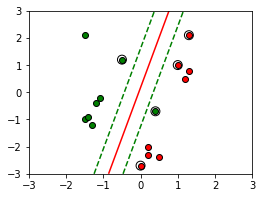

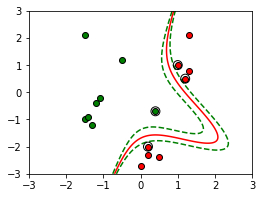

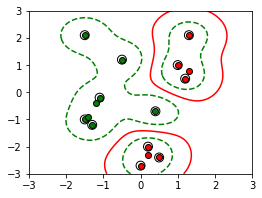

In [10]:
fignum = 1 # 表示第几幅图

# 使用三种不同的核
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2) # gamma=1/(2*σ^2)
    clf.fit(X, Y)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    # 支撑向量
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    # 第一类
    plt.scatter(X[:8, 0], X[:8, 1], c='g', zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')
    # 第二类
    plt.scatter(X[8:, 0], X[8:, 1], c='r', zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # 复数类似np.linspace
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # 绘制决策边界和间距
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.contour(XX, YY, Z, colors=['g', 'r', 'g'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5]) # 为了图看着好看，间距设置成0.5

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    fignum = fignum + 1
plt.show()